In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("/content/IMDb Movies India.csv", encoding = 'latin1')

In [5]:
#To get the first 5 rows
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
#To get the last 5 rows
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [7]:
#To check the column names
data.columns


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [8]:
data.isnull().any()

Name        False
Year         True
Duration     True
Genre        True
Rating       True
Votes        True
Director     True
Actor 1      True
Actor 2      True
Actor 3      True
dtype: bool

In [9]:
data['Duration'] = pd.to_numeric(data['Duration'].str.replace(' min', ''), errors='coerce')
data['Duration'].fillna(data['Duration'].mean(), inplace=True)

In [10]:
data['Year'] = pd.to_numeric(data['Year'].str.strip(' ()'))
data['Year'].fillna(data['Year'].mean(), inplace=True)
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1987.012215,128.126519,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.000000,109.000000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.000000,90.000000,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.000000,110.000000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.000000,105.000000,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988.000000,128.126519,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999.000000,129.000000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005.000000,128.126519,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988.000000,128.126519,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data['Year'] = data['Year'].round(0).astype(int)

In [12]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1987,128.126519,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109.000000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90.000000,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110.000000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105.000000,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,128.126519,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129.000000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005,128.126519,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988,128.126519,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data['Rating'].fillna(data['Rating'].mean(), inplace = True)

In [14]:
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')
data['Votes'].fillna(data['Votes'].mean(), inplace=True)
data['Votes'] = data['Votes'].astype(int)
data


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1987,128.126519,Drama,5.841621,120,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109.000000,Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90.000000,"Drama, Musical",5.841621,120,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110.000000,"Comedy, Romance",4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105.000000,Drama,5.841621,120,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,128.126519,Action,4.600000,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129.000000,"Action, Drama",4.500000,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005,128.126519,Action,5.841621,120,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988,128.126519,Action,5.841621,120,NaN,NaN,NaN,NaN


In [26]:
# Plot the number of movies released by year
year_count = data['Year'].value_counts().reset_index()
year_count.columns = ['Year', 'Count']

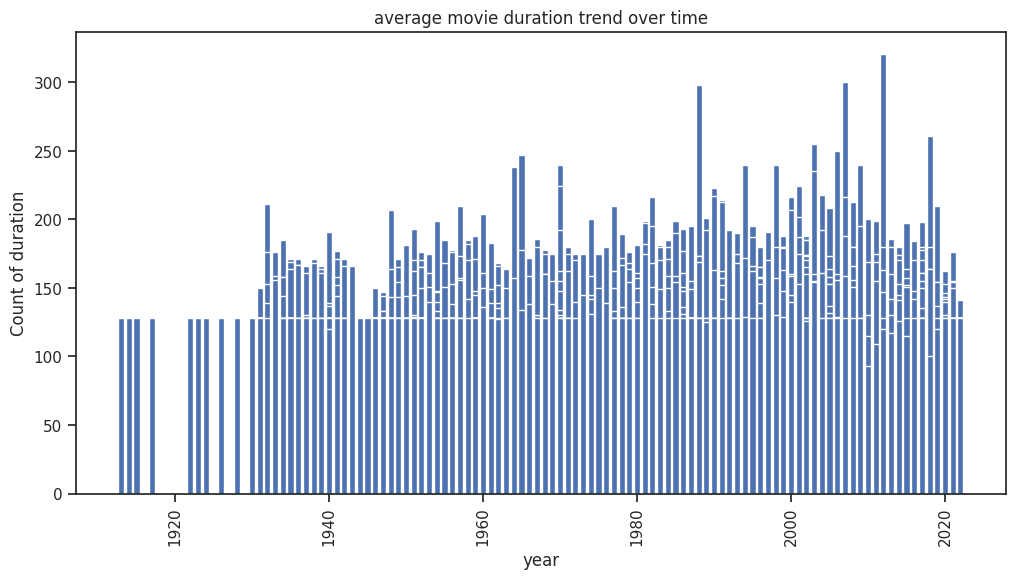

In [44]:
# Set the font to the default font
plt.rcParams['font.family'] = 'sans-serif'

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(data['Year'], data['Duration'])
plt.xlabel('year')
plt.ylabel('Count of duration')
plt.title('average movie duration trend over time')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

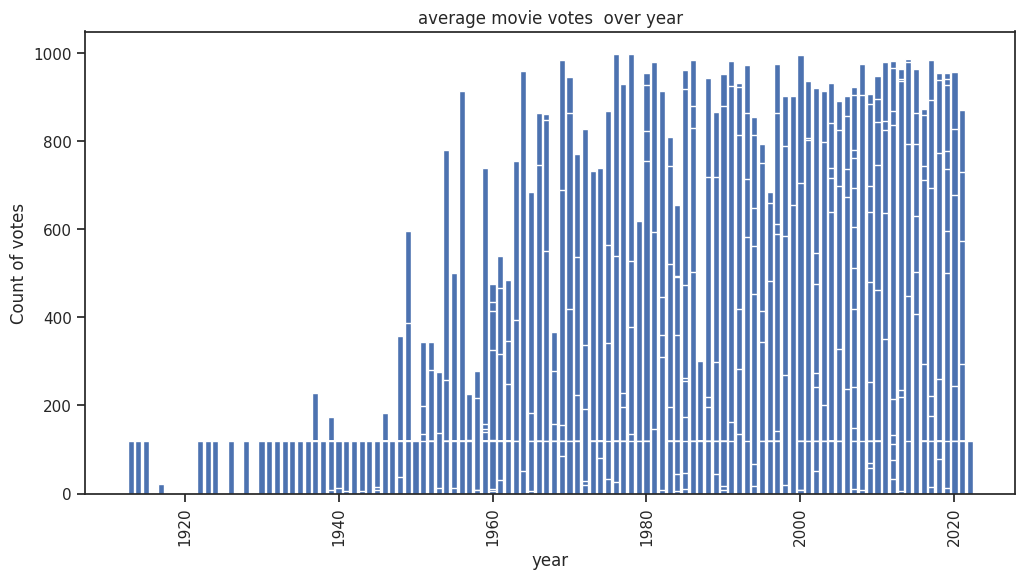

In [45]:
# Set the font to the default font
plt.rcParams['font.family'] = 'sans-serif'

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(data['Year'], data['Votes'])
plt.xlabel('year')
plt.ylabel('Count of votes')
plt.title('average movie votes  over year')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [47]:
data.head(3)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1987,128.126519,Drama,5.841621,120,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109.000000,Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90.000000,"Drama, Musical",5.841621,120,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


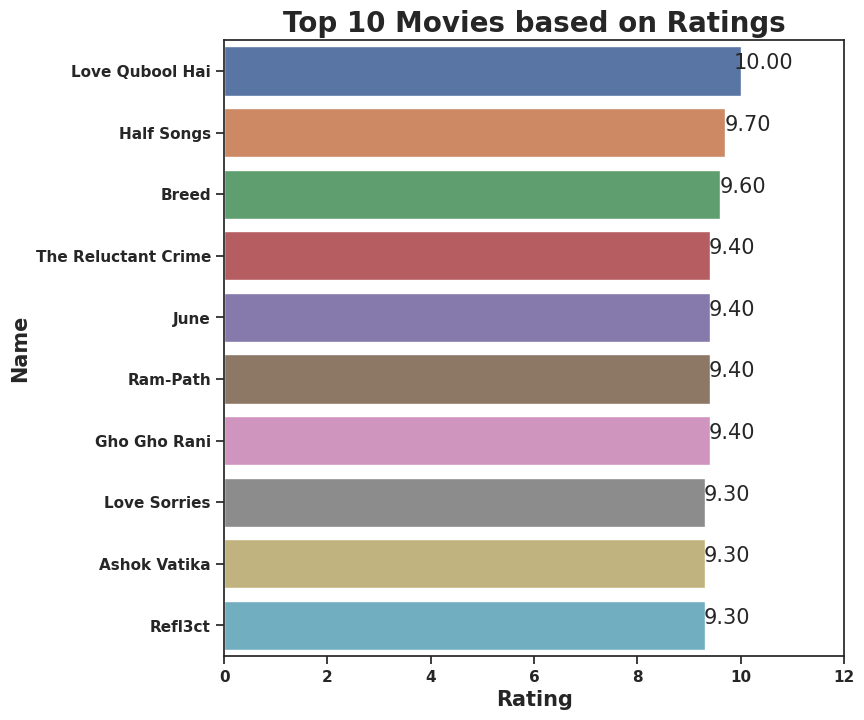

In [53]:
#intializing figure of the chart
plt.figure(figsize=(8, 8))

#Dropping the index where Year is 2022,as 2022 is in future
dframe= data.set_index('Year')


#sorting Name and Rating by Rating then selecting top 10
top_movies= dframe[['Name','Rating']].sort_values(by='Rating',ascending=False).head(10)

plots = sns.barplot(x="Rating", y="Name", data=top_movies)

for bar in plots.patches:

    plots.annotate(format(bar.get_width(),'.2f'), (bar.get_x() + bar.get_width()+0.3, bar.get_y()+0.5), ha='center', va='center',size=15, xytext=(5,10),textcoords='offset points')
plt.xlabel("Rating",fontsize=15,fontweight='bold')
plt.ylabel("Name",fontsize=15,fontweight='bold')
plt.title("Top 10 Movies based on Ratings",fontsize=20,fontweight='bold')

plt.xticks(np.arange(0,13,2),fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()